# Data Processing for Soccer Results Data

In [227]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import json



In [228]:
# load data
df = pd.read_csv('results.csv')

# preprocessing
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[df['year'] != 2024]

# show data
print(df.shape)
df.head()

(46791, 10)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [229]:
games_json

'{"1872":{"number_of_games":1},"1873":{"number_of_games":1},"1874":{"number_of_games":1},"1875":{"number_of_games":1},"1876":{"number_of_games":2},"1877":{"number_of_games":2},"1878":{"number_of_games":2},"1879":{"number_of_games":3},"1880":{"number_of_games":3},"1881":{"number_of_games":3},"1882":{"number_of_games":5},"1883":{"number_of_games":5},"1884":{"number_of_games":6},"1885":{"number_of_games":7},"1886":{"number_of_games":7},"1887":{"number_of_games":6},"1888":{"number_of_games":7},"1889":{"number_of_games":6},"1890":{"number_of_games":6},"1891":{"number_of_games":6},"1892":{"number_of_games":6},"1893":{"number_of_games":5},"1894":{"number_of_games":6},"1895":{"number_of_games":6},"1896":{"number_of_games":6},"1897":{"number_of_games":6},"1898":{"number_of_games":6},"1899":{"number_of_games":6},"1900":{"number_of_games":6},"1901":{"number_of_games":6},"1902":{"number_of_games":8},"1903":{"number_of_games":10},"1904":{"number_of_games":9},"1905":{"number_of_games":14},"1906":{"n

,year,number_of_games
0,1872,1
1,1873,1
2,1874,1
3,1875,1
4,1876,2
...,...,...
147,2019,1147
148,2020,347
149,2021,1115
150,2022,969


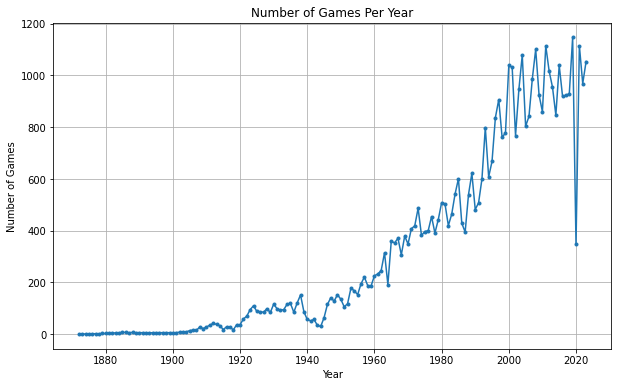

In [233]:
# count of games per year
games_per_year = df.groupby('year').size().reset_index(name='number_of_games')
display(games_per_year)
games_per_year.to_csv('games_per_year.csv', index=False)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(games_per_year['year'], games_per_year['number_of_games'], marker='.', linestyle='-')
plt.title('Number of Games Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

games_json = games_per_year.set_index('year').to_json(orient='index')
with open("games_per_year.json", "w") as outfile: 
    json.dump(games_json, outfile)

,year,average_goals_per_game
0,1872,0.000000
1,1873,6.000000
2,1874,3.000000
3,1875,4.000000
4,1876,3.500000
...,...,...
147,2019,2.889276
148,2020,2.440922
149,2021,2.758744
150,2022,2.514964


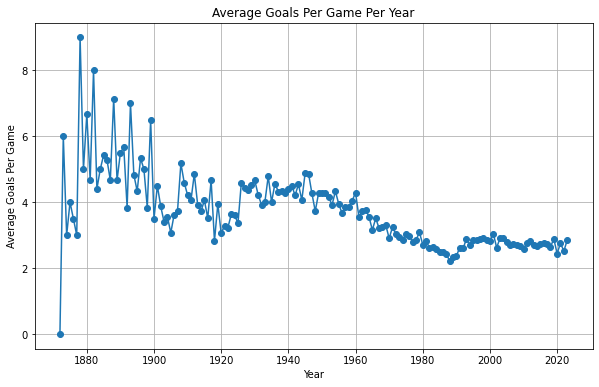

In [231]:
# Calculate total goals per game
df['total_goals'] = df['home_score'] + df['away_score']

# Calculate average goals per game per year
average_goals_per_year = df.groupby('year')['total_goals'].mean().reset_index(name='average_goals_per_game')

# Display the dataframe with average goals per game per year
display(average_goals_per_year)

# Create a line chart for average goals per game per year
plt.figure(figsize=(10, 6))
plt.plot(average_goals_per_year['year'], average_goals_per_year['average_goals_per_game'], marker='o', linestyle='-')
plt.title('Average Goals Per Game Per Year')
plt.xlabel('Year')
plt.ylabel('Average Goals Per Game')
plt.grid(True)
plt.show()

,year,unique_teams,number_of_unique_teams
0,1872,"[Scotland, England]",2
1,1873,"[England, Scotland]",2
2,1874,"[Scotland, England]",2
3,1875,"[England, Scotland]",2
4,1876,"[Scotland, England, Wales]",3
...,...,...,...
147,2019,"[Oman, United Arab Emirates, Thailand, Austral...",252
148,2020,"[Barbados, Moldova, Kosovo, Canada, El Salvado...",140
149,2021,"[United Arab Emirates, Kuwait, Dominican Repub...",196
150,2022,"[Thailand, Gabon, Sudan, Rwanda, Mauritania, A...",221


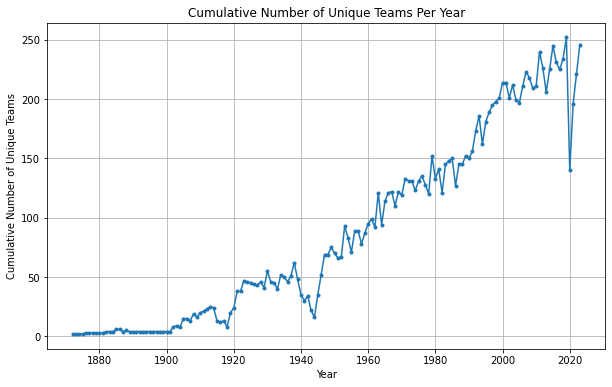

In [186]:
# unique teams
unique_teams_per_year = df.groupby('year').apply(lambda x: pd.unique(x[['home_team', 'away_team']].values.ravel('K'))).reset_index(name='unique_teams')
unique_teams_per_year['number_of_unique_teams'] = unique_teams_per_year['unique_teams'].apply(len)
display(unique_teams_per_year)

# Create a line chart for the cumulative number of unique teams per year
plt.figure(figsize=(10, 6))
plt.plot(unique_teams_per_year['year'], unique_teams_per_year['number_of_unique_teams'], marker='.', linestyle='-')
plt.title('Cumulative Number of Unique Teams Per Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unique Teams')
plt.grid(True)
plt.show()

teams_json = unique_teams_per_year.drop(columns=['unique_teams']).set_index('year').to_json(orient='index')
with open("unique_teams_per_year.json", "w") as outfile: 
    json.dump(teams_json, outfile)

In [201]:
# load data
df = pd.read_csv('results.csv')

# preprocessing
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[df['year'] != 2024]

# Calculate total goals scored by each team each year
home_goals = df.groupby(['year', 'home_team'])['home_score'].sum().reset_index()
home_goals.columns = ['year', 'team', 'goals']
away_goals = df.groupby(['year', 'away_team'])['away_score'].sum().reset_index()
away_goals.columns = ['year', 'team', 'goals']

# Combine home and away goals
total_goals = pd.concat([home_goals, away_goals])
total_goals = total_goals.groupby(['year', 'team'])['goals'].sum().reset_index()
total_goals = total_goals.sort_values(by=['year', 'team'])

# Calculate cumulative goals scored by each nation each year
total_goals['cumulative_goals'] = total_goals.groupby('team')['goals'].cumsum()

# Ensure each team has an entry for each year, filling with their last known cumulative goals
years = sorted(total_goals['year'].unique())
teams = total_goals['team'].unique()

all_combinations = pd.MultiIndex.from_product([years, teams], names=['year', 'team']).to_frame(index=False)
full_data = all_combinations.merge(total_goals, on=['year', 'team'], how='left').fillna(0)

full_data['cumulative_goals'] = full_data.groupby('team')['cumulative_goals'].cummax()

# Get the top 10 teams with the most cumulative goals each year
top_teams_per_year = {}
for year in years:
    yearly_data = full_data[full_data['year'] == year]
    yearly_data = yearly_data[yearly_data['cumulative_goals'] > 0]  # Exclude zero cumulative goals
    top_10_teams = yearly_data.nlargest(10, 'cumulative_goals')
    top_teams_per_year[year] = top_10_teams[['team', 'cumulative_goals']].to_dict(orient='records')

# Convert the dictionary to a JSON format
json_data = [{'year': int(year), 'top_teams': top_teams_per_year[year]} for year in sorted(top_teams_per_year.keys())]

# Display the JSON data
json_output = json.dumps(json_data, indent=4)
print(json_output)

[
    {
        "year": 1872,
        "top_teams": []
    },
    {
        "year": 1873,
        "top_teams": [
            {
                "team": "England",
                "cumulative_goals": 4.0
            },
            {
                "team": "Scotland",
                "cumulative_goals": 2.0
            }
        ]
    },
    {
        "year": 1874,
        "top_teams": [
            {
                "team": "England",
                "cumulative_goals": 5.0
            },
            {
                "team": "Scotland",
                "cumulative_goals": 4.0
            }
        ]
    },
    {
        "year": 1875,
        "top_teams": [
            {
                "team": "England",
                "cumulative_goals": 7.0
            },
            {
                "team": "Scotland",
                "cumulative_goals": 6.0
            }
        ]
    },
    {
        "year": 1876,
        "top_teams": [
            {
                "team": "Scotland",
          

In [204]:
json_data[68]

{'year': 1940,
 'top_teams': [{'team': 'England', 'cumulative_goals': 671.0},
  {'team': 'Sweden', 'cumulative_goals': 604.0},
  {'team': 'Hungary', 'cumulative_goals': 576.0},
  {'team': 'Scotland', 'cumulative_goals': 512.0},
  {'team': 'Austria', 'cumulative_goals': 449.0},
  {'team': 'Germany', 'cumulative_goals': 427.0},
  {'team': 'Argentina', 'cumulative_goals': 415.0},
  {'team': 'Netherlands', 'cumulative_goals': 352.0},
  {'team': 'Belgium', 'cumulative_goals': 329.0},
  {'team': 'Czechoslovakia', 'cumulative_goals': 323.0}]}

In [224]:
# Top goalscorers
# goalscorers dataset
df = pd.read_csv('goalscorers.csv')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date column
df['year'] = df['date'].dt.year

# Calculate total goals scored by each player each year
goals_per_year = df.groupby(['year', 'scorer'])['minute'].count().reset_index()
goals_per_year.columns = ['year', 'player', 'goals']
goals_per_year.sort_values(by=['player', 'year'], inplace=True)
# Calculate cumulative goals scored by each player each year
goals_per_year['cumulative_goals'] = goals_per_year.groupby('player')['goals'].cumsum()

# Ensure each player has an entry for each year, filling with their last known cumulative goals
years = sorted(total_goals['year'].unique())
years = [y for y in years if y > 1915]
years.append(2024)
players = goals_per_year['player'].unique()

all_combinations = pd.MultiIndex.from_product([years, players], names=['year', 'player']).to_frame(index=False)
full_data = all_combinations.merge(goals_per_year, on=['year', 'player'], how='left').fillna(0)
full_data = full_data.sort_values(by=['player', 'year'])
full_data['cumulative_goals'] = full_data.groupby('player')['cumulative_goals'].cummax()

# Get the top 10 goal scorers each year
top_scorers_per_year = {}
for year in years:
    yearly_data = full_data[full_data['year'] == year]
    yearly_data = yearly_data[yearly_data['cumulative_goals'] > 0]  # Exclude zero cumulative goals
    top_10_scorers = yearly_data.nlargest(10, 'cumulative_goals')
    top_scorers_per_year[year] = top_10_scorers[['player', 'cumulative_goals']].to_dict(orient='records')

# Convert the dictionary to a JSON format
json_data = [{'year': int(year), 'top_scorers': top_scorers_per_year[year]} for year in sorted(top_scorers_per_year.keys())]

# Display the JSON data
# Convert and write JSON object to file
with open("top_goal_scorers_cumulative_goals_by_year.json", "w") as outfile: 
    json.dump(json_data, outfile)
# json_output = json.dumps(json_data, indent=4)
# print(json_output)



In [225]:
json_data[-1]

{'year': 2024,
 'top_scorers': [{'player': 'Cristiano Ronaldo', 'cumulative_goals': 108.0},
  {'player': 'Robert Lewandowski', 'cumulative_goals': 63.0},
  {'player': 'Romelu Lukaku', 'cumulative_goals': 60.0},
  {'player': 'Harry Kane', 'cumulative_goals': 58.0},
  {'player': 'Lionel Messi', 'cumulative_goals': 55.0},
  {'player': 'Edin Džeko', 'cumulative_goals': 50.0},
  {'player': 'Ali Daei', 'cumulative_goals': 49.0},
  {'player': 'Miroslav Klose', 'cumulative_goals': 48.0},
  {'player': 'Aleksandar Mitrović', 'cumulative_goals': 47.0},
  {'player': 'Carlos Ruiz', 'cumulative_goals': 47.0}]}